In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
init_printing()

In [2]:
x1, x2, ρ, ρ1, ρ2, m, m1, m2, w, w1, w2, W1, W2 = symbols('x1 x2 ρ ρ1 ρ2 m m1 m2 w w1 w2 W1 W2') 

# Oblique

In [135]:
w1 = w
w2 = 1/w
W1 = w1*x1 + 1-x1
W2 = w2*x2 + 1-x2
m1 = m
m2 = m
ρ1 = 0
ρ2 = 0
eqs = [
    (1-m1)*x1*(w1/W1*ρ1+1-ρ1) + m2*x2*(w2/W2*ρ2+1-ρ2) - x1,
    (1-m2)*x2*(w2/W2*ρ2+1-ρ2) + m1*x1*(w1/W1*ρ1+1-ρ1) - x2
]
eqs

In [136]:
sol = solve(eqs, (x1, x2))
sol

# Vertical

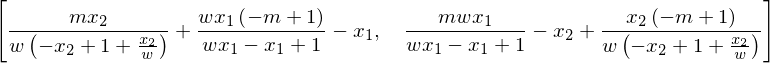

In [23]:
w1 = w
w2 = 1/w
W1 = w1*x1 + 1-x1
W2 = w2*x2 + 1-x2
m1 = m
m2 = m
ρ1 = 1
ρ2 = 1
eqs = [
    (1-m1)*x1*(w1/W1*ρ1+1-ρ1) + m2*x2*(w2/W2*ρ2+1-ρ2) - x1,
    (1-m2)*x2*(w2/W2*ρ2+1-ρ2) + m1*x1*(w1/W1*ρ1+1-ρ1) - x2
]
eqs

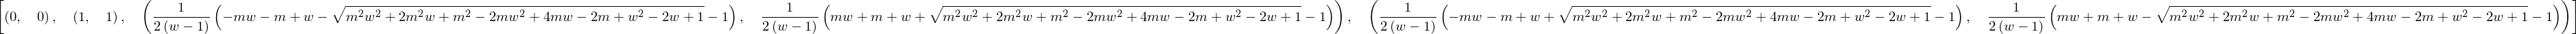

In [24]:
sol = solve(eqs, (x1, x2))
sol

In [25]:
simplify(
    (-(sol[2][0]*2*(w-1)+m*w+m-w+1))**2 - (m**2*(w+1)**2 + (w-1)**2*(1-2*m))
)

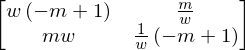

In [26]:
J00 = Matrix([
    [
        (x1+eqs[0]).diff(x1), (x1+eqs[0]).diff(x2)
    ],
    [
        (x2+eqs[1]).diff(x1), (x2+eqs[1]).diff(x2)
    ]
]).subs({x1:0, x2:0})
J00

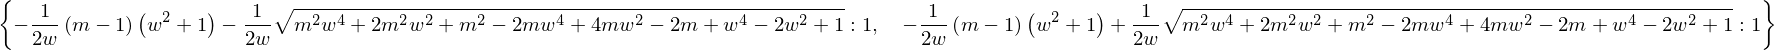

In [27]:
eigs00 = J00.eigenvals()
eigs00

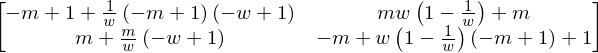

In [8]:
J11 = Matrix([
    [
        (x1+eqs[0]).diff(x1), (x1+eqs[0]).diff(x2)
    ],
    [
        (x2+eqs[1]).diff(x1), (x2+eqs[1]).diff(x2)
    ]
]).subs({x1:1, x2:1})
J11

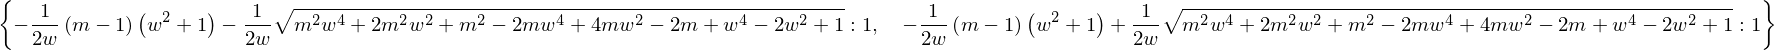

In [9]:
eigs11 = J11.eigenvals()
eigs11 

In [10]:
eigs11 == eigs00

True

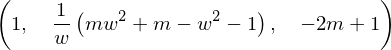

In [28]:
poly = J00.charpoly()
a, b, c = poly.coeffs()
a, b, c

In [29]:
b_ = -(1-m)*(w**2+1)/w
simplify(b - b_)

In [30]:
c_ = 1-2*m
simplify(c - c_)

In [31]:
abc = -(1-m)*(w-1)**2/w
simplify(a+b+c - abc)

In [46]:
print(latex(simplify((b_**2 - 4*c_).factor(m))))

\frac{1}{w^{2}} \left(m^{2} \left(w^{4} + 2 w^{2} + 1\right) - 2 m \left(w^{4} - 2 w^{2} + 1\right) + w^{4} - 2 w^{2} + 1\right)


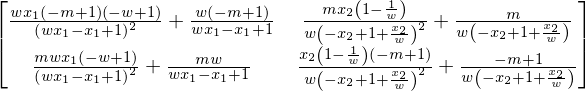

In [24]:
Jxstar = Matrix([
    [
        (x1+eqs[0]).diff(x1), (x1+eqs[0]).diff(x2)
    ],
    [
        (x2+eqs[1]).diff(x1), (x2+eqs[1]).diff(x2)
    ]
])
Jxstar

# Vertical + Oblique

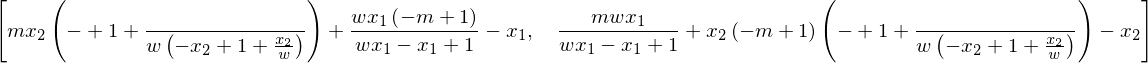

In [3]:
w1 = w
w2 = 1/w
W1 = w1*x1 + 1-x1
W2 = w2*x2 + 1-x2
m1 = m
m2 = m
ρ1 = 1
ρ2 = ρ
eqs = [
    (1-m1)*x1*(w1/W1*ρ1+1-ρ1) + m2*x2*(w2/W2*ρ2+1-ρ2) - x1,
    (1-m2)*x2*(w2/W2*ρ2+1-ρ2) + m1*x1*(w1/W1*ρ1+1-ρ1) - x2
]
eqs

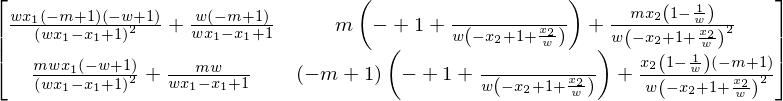

In [4]:
J = Matrix([
    [
        (x1+eqs[0]).diff(x1), (x1+eqs[0]).diff(x2)
    ],
    [
        (x2+eqs[1]).diff(x1), (x2+eqs[1]).diff(x2)
    ]
])
J

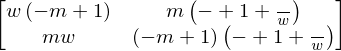

In [5]:
J00 = J.subs({x1:0, x2:0})
J00

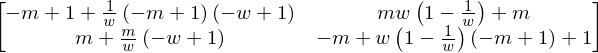

In [6]:
J11 = J.subs({x1:1, x2:1})
J11

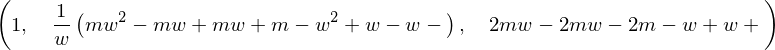

In [15]:
a, b, c = J00.charpoly().coeffs()
a, b, c

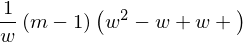

In [16]:
b = b.factor(m)
b

In [17]:
print(latex(b))

\frac{1}{w} \left(m - 1\right) \left(w^{2} - w ρ + w + ρ\right)


In [18]:
c = c.factor(m)
c

In [19]:
c_ = (1-2*m)*(w*(1-ρ)+ρ)
simplify(c - c_)

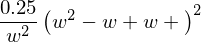

In [20]:
Δ = (b**2 - 4*a*c)
simplify(Δ.subs({m:0.5}))

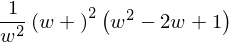

In [21]:
simplify(Δ.subs({m:0}).factor(ρ))

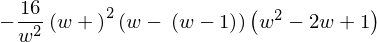

In [105]:
am, bm, cm = Δ.as_poly(m).coeffs()
simplify((bm**2 - 4*am*cm).factor(ρ))

In [12]:
(a+b+c).factor(ρ).subs({ρ:0})

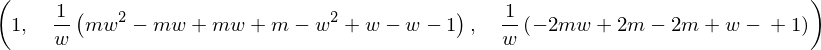

In [36]:
a, b, c = J11.charpoly().coeffs()
a, b, c

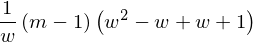

In [37]:
b = b.factor(m)
b

In [38]:
b_ = -(1-m)/w * (w*(1-ρ) + 1 + w**2 * ρ)
simplify(b - b_)

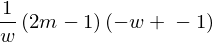

In [39]:
c = c.factor(m)
c

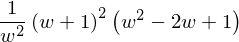

In [40]:
Δ = b**2 - 4 * a * c
simplify(Δ.subs({m:0}).factor(ρ))

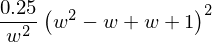

In [41]:
simplify(Δ.subs({m:0.5}))

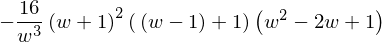

In [45]:
am, bm, cm = Δ.as_poly(m).coeffs()
simplify((bm**2 - 4*am*cm).factor(ρ))

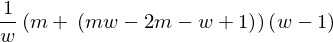

In [35]:
(a+b+c).factor(ρ)

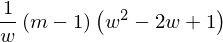

In [74]:
(a+b+c).subs({ρ:1}).factor(m)

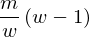

In [75]:
(a+b+c).subs({ρ:0}).factor(m)

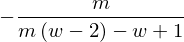

In [98]:
ρhat = solve(a+b+c, ρ)[0]
ρhat.factor(m)

In [99]:
ρhat_ = m/(m+(1-m)*(w-1))
simplify(ρhat - ρhat_)

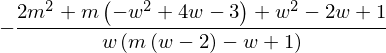

In [101]:
(2*a+b).subs({ρ:ρhat}).factor(m)

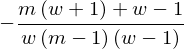

In [89]:
ρ0 = solve(2*a+b, ρ)[0]
ρ0.factor(m)

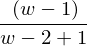

In [109]:
mhat = solve(a+b+c, m)[0]
mhat

In [111]:
simplify((a+b+c).subs({m:0}))

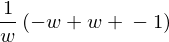

In [113]:
simplify((a+b+c).subs({m:1}))

In [116]:
(2*a+b).subs({m:1})

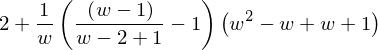

In [140]:
(2*a+b).subs({m:mhat})

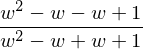

In [145]:
solve(2*a+b, m)[0]

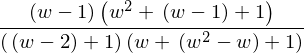

In [143]:
(mhat - solve(2*a+b, m)[0]).factor(ρ)

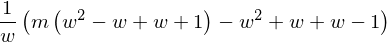

In [144]:
(2*a+b).factor(m)